# Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# DỮ LIỆU

## GIÁ CÀ PHÊ

In [ ]:
df_coffee = pd.read_csv('https://raw.githubusercontent.com/thuongh2/FinalProject/main/data_final/CaPhe/gia_cafe.csv', encoding='ISO-8859-1')
df_coffee.head()

,date,price
0,1/2/2007,21600.0
1,1/3/2007,22000.0
2,1/4/2007,21700.0
3,1/5/2007,22000.0
4,1/6/2007,22000.0


In [ ]:
df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6358 entries, 0 to 6357
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6358 non-null   object 
 1   price   6358 non-null   float64
dtypes: float64(1), object(1)
memory usage: 99.5+ KB


In [ ]:
df_coffee['date'] = pd.to_datetime(df_coffee['date'])
df_coffee.set_index('date', inplace=True)

In [ ]:
missing_values = df_coffee.isnull().sum()
missing_values

price    0
dtype: int64

### Xử lý outlier

In [ ]:
Q1 = df_coffee['price'].quantile(0.25)
Q3 = df_coffee['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = df_coffee[(df_coffee['price'] < lower_bound)]
print("Số lượng outlier:", len(outliers))

Số lượng outlier: 0


In [ ]:
df_coffee.at[df_coffee.index[0], 'price'] = min(max(df_coffee.iloc[0]['price'], lower_bound), upper_bound)

for index, row in outliers.iterrows():
    previous_date_index = df_coffee.index.get_loc(index) - 1
    if previous_date_index >= 0:
        previous_date = df_coffee.index[previous_date_index]
        previous_value = df_coffee.loc[previous_date, 'price']
        df_coffee.at[index, 'price'] = previous_value

### Fill dữ liệu ngày thiếu

In [ ]:
df_coffee.shape

(6358, 1)

In [ ]:
# Fill các ngày còn thiếu
idx = pd.date_range(df_coffee.index.min(), df_coffee.index.max())
df_coffee = df_coffee.reindex(idx)
df_coffee.fillna(method='ffill', inplace=True)
df_coffee.tail()

,price
2024-05-28,116700.0
2024-05-29,120700.0
2024-05-30,122700.0
2024-05-31,123500.0
2024-06-01,120000.0


In [ ]:
df_coffee.shape

(6361, 1)

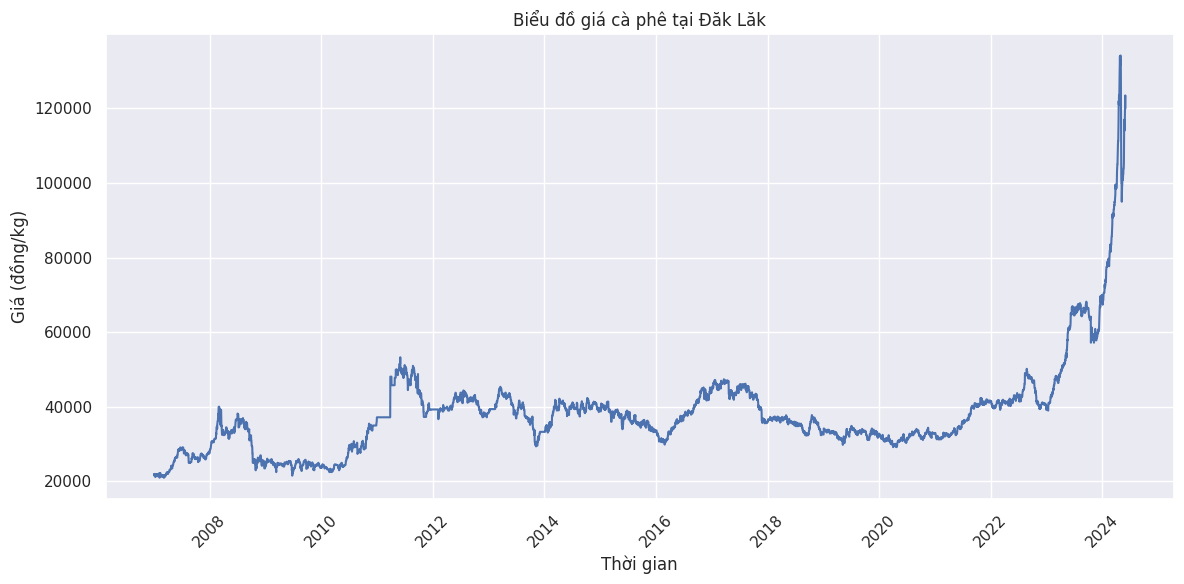

In [ ]:
# Vẽ biểu đồ
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_coffee, x=df_coffee.index, y='price')
plt.title('Biểu đồ giá cà phê tại Đăk Lăk')
plt.xlabel('Thời gian')
plt.ylabel('Giá (đồng/kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## XUẤT KHẨU VÀ PHÊ

In [ ]:
df_coffee_export = pd.read_csv('https://raw.githubusercontent.com/thuongh2/FinalProject/main/data_final/CaPhe/gia_xuat_khau_cafe.csv', encoding='ISO-8859-1')
df_coffee_export.tail()

,date,Luong (nghin tan),Kim ngach (trieu USD),Trieu USD/ Nghin tan
177,10/1/2023,39.62,145.00,3.659768
178,11/1/2023,109.48,327.51,2.991505
179,12/1/2023,207.16,599.14,2.892161
180,1/1/2024,238.27,726.59,3.049440
181,2/1/2024,160.56,528.27,3.290172


In [ ]:
df_coffee_export['date'] = pd.to_datetime(df_coffee_export['date'])
df_coffee_export.set_index('date', inplace=True)

### Fill dữ liệu ngày bị thiếu

In [ ]:
idx = pd.date_range(df_coffee_export.index.min(), df_coffee_export.index.max())
df_coffee_export = df_coffee_export.reindex(idx)

In [ ]:
df_coffee_export.fillna(method='ffill', inplace=True)
df_coffee_export.tail()

,Luong (nghin tan),Kim ngach (trieu USD),Trieu USD/ Nghin tan
2024-01-28,238.27,726.59,3.049440
2024-01-29,238.27,726.59,3.049440
2024-01-30,238.27,726.59,3.049440
2024-01-31,238.27,726.59,3.049440
2024-02-01,160.56,528.27,3.290172


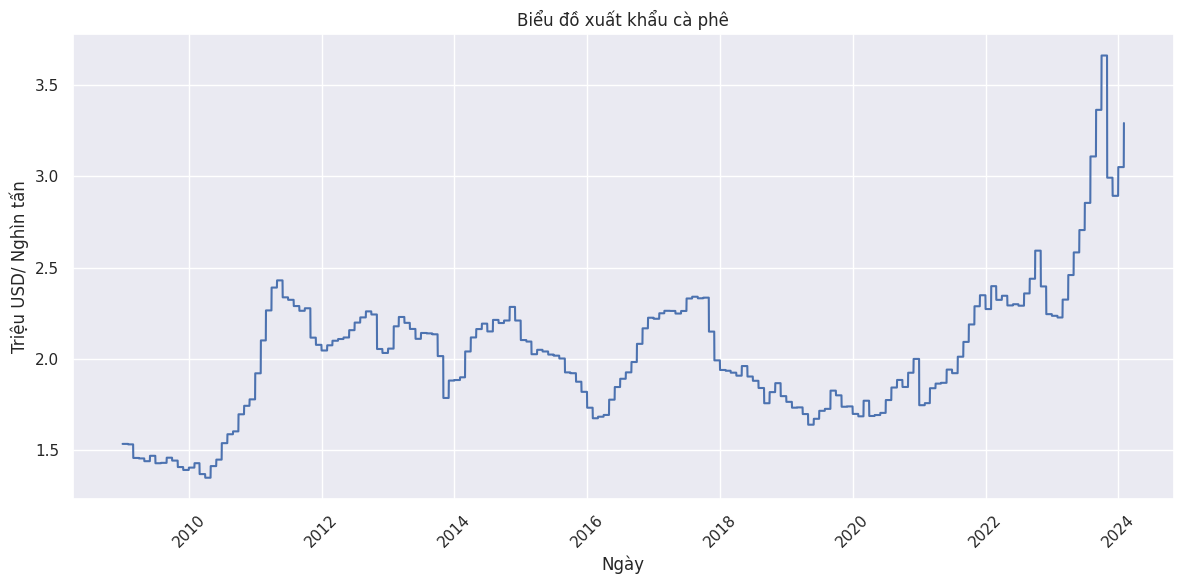

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_coffee_export, x=df_coffee_export.index, y='Trieu USD/ Nghin tan')
plt.title('Biểu đồ xuất khẩu cà phê')
plt.xlabel('Ngày')
plt.ylabel('Triệu USD/ Nghìn tấn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Merge dữ liệu xuất khẩu vào giá cà phê

In [ ]:
start_date = df_coffee_export.index.min()
df_coffee_filtered = df_coffee.loc[start_date:]

df_merged_coffee_export = pd.merge(df_coffee_filtered, df_coffee_export[['Trieu USD/ Nghin tan']], left_index=True, right_index=True, how='left')
df_merged_coffee_export['Trieu USD/ Nghin tan'] = df_merged_coffee_export['Trieu USD/ Nghin tan'].ffill()

print(df_merged_coffee_export.tail())

               price  Trieu USD/ Nghin tan
2024-05-28  116700.0              3.290172
2024-05-29  120700.0              3.290172
2024-05-30  122700.0              3.290172
2024-05-31  123500.0              3.290172
2024-06-01  120000.0              3.290172


## GIÁ XĂNG

In [ ]:
df_gasoline = pd.read_csv('https://raw.githubusercontent.com/thuongh2/FinalProject/main/data_final/Xang/gia_xang.csv', encoding='ISO-8859-1')
df_gasoline.head()

,date,RON 95-III
0,22/08/2018,21.17
1,6/9/2018,21.47
2,21/09/2018,21.77
3,6/10/2018,22.34
4,22/10/2018,22.20


### Fill dữ liệu ngày thiếu

In [ ]:
df_gasoline['date'] = pd.to_datetime(df_gasoline['date'])
df_gasoline.set_index('date', inplace=True)

<ipython-input-54-2ca4586e2886>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_gasoline['date'] = pd.to_datetime(df_gasoline['date'])


In [ ]:
idx = pd.date_range(df_gasoline.index.min(), df_gasoline.index.max())
df_gasoline = df_gasoline.reindex(idx)
df_gasoline.fillna(method='ffill', inplace=True)

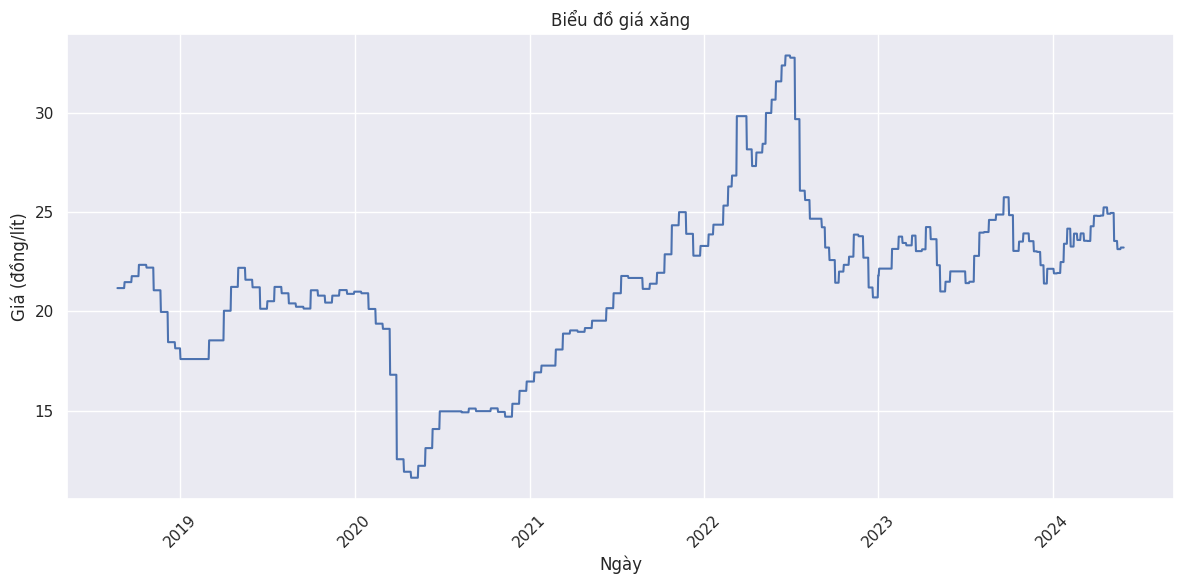

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_gasoline, x=df_gasoline.index, y='RON 95-III')
plt.title('Biểu đồ giá xăng')
plt.xlabel('Ngày')
plt.ylabel('Giá (đồng/lít)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Merge dữ liệu xăng với cà phê

In [ ]:
start_date = df_gasoline.index.min()
df_coffee_filtered = df_coffee.loc[start_date:]

df_merged_gasoline = pd.merge(df_coffee_filtered, df_gasoline[['RON 95-III']], left_index=True, right_index=True, how='left')
df_merged_gasoline['RON 95-III'] = df_merged_gasoline['RON 95-III'].ffill()

print(df_merged_gasoline.tail())

               price  RON 95-III
2024-05-28  116700.0       23.21
2024-05-29  120700.0       23.21
2024-05-30  122700.0       23.21
2024-05-31  123500.0       23.21
2024-06-01  120000.0       23.21


## Tính correlation

In [ ]:
start_date = df_gasoline.index.min()
df_coffee_filtered = df_coffee.loc[start_date:]

df_coffee_merged = pd.merge(df_coffee_filtered, df_coffee_export[['Trieu USD/ Nghin tan']], left_index=True, right_index=True, how='left')
df_coffee_merged['Trieu USD/ Nghin tan'] = df_coffee_merged['Trieu USD/ Nghin tan'].ffill()

df_coffee_merged = pd.merge(df_coffee_merged, df_gasoline[['RON 95-III']], left_index=True, right_index=True, how='left')
df_coffee_merged['RON 95-III'] = df_coffee_merged['RON 95-III'].ffill()

df_coffee_merged.tail()

,price,Trieu USD/ Nghin tan,RON 95-III
2024-05-28,116700.0,3.290172,23.21
2024-05-29,120700.0,3.290172,23.21
2024-05-30,122700.0,3.290172,23.21
2024-05-31,123500.0,3.290172,23.21
2024-06-01,120000.0,3.290172,23.21


In [ ]:
corr_matrix = df_coffee_merged[['price', 'Trieu USD/ Nghin tan', 'RON 95-III']].corr()

price_corr = corr_matrix[['price']]

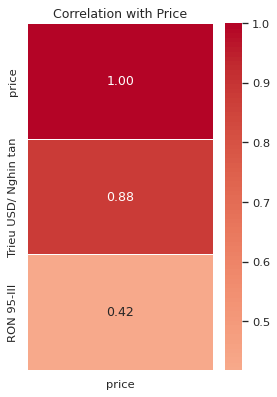

In [ ]:
plt.figure(figsize=(4, 6), dpi=75)
sns.heatmap(price_corr, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm', center=0)
plt.title('Correlation with Price')
plt.show()
